# 시각화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
# 한글폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The operation couldn’t be completed. Unable to locate a Java Runtime that supports apt.
Please visit http://www.java.com for information on installing Java.



Matplotlib is building the font cache; this may take a moment.


In [3]:
gender = pd.read_csv('whole-gender-bill-1320.csv', index_col=0,
                           parse_dates=['제안일자','의결일자'],encoding='utf-8-sig')
print(gender.shape)
gender.head(1)

(4521, 16)


,의안번호,의안명,제안일자,제안자구분,의결일자,의결결과,제안회기,제안이유,소관위원회,제안자,발의자,제안정당,성별,여성의원 수,정당성향,국회회기
0,131131,소득세법중개정법률안,1990-12-17,위원장,1990-12-18,원안가결,제13대 (1988~1992) 제151회,"정부제출,柳인학·강金식·금봉욱·林춘원·李경재·허만기·홍영기의원외64인 발의,1...",재무위원회,[],위원장,위원장,NaN,0,NaN,13


In [4]:
gender['제안일자'] = gender['제안일자'].dt.date
gender['의결일자'] = gender['의결일자'].dt.date

In [5]:
drop_list = [177919, 177064, 176854, 176797, 176796, 176795, 176794]

gender = gender[~gender['의안번호'].isin(drop_list)]
gender = gender.reset_index()
gender = gender.drop('index',1)
gender.shape

(4514, 16)

## 역대 국회 정당별 발의건수

In [6]:
gender['국회회기'].value_counts()

20    2016
19    1044
18     820
17     416
16      96
15      83
14      22
13      17
Name: 국회회기, dtype: int64

In [6]:
gender.groupby(['정당성향','국회회기'])['의안번호'].count()

정당성향  국회회기
보수    13         6
      14         4
      15        31
      16        40
      17       167
      18       412
      19       398
      20       508
진보    13         3
      14         6
      15        24
      16        14
      17       158
      18       282
      19       542
      20      1341
Name: 의안번호, dtype: int64

In [7]:
pd.DataFrame(gender.groupby(['국회회기','정당성향','성별'])['의안번호'].count())

의안번호
국회회기 정당성향 성별      
13   보수   남성     3
          여성     3
     진보   남성     1
          여성     2
14   보수   남성     1
          여성     3
     진보   남성     5
          여성     1
15   보수   남성    16
          여성    15
     진보   남성    18
          여성     6
16   보수   남성    28
          여성    12
     진보   남성     4
          여성    10
17   보수   남성    74
          여성    93
     진보   남성    76
          여성    82
18   보수   남성   239
          여성   173
     진보   남성   172
          여성   110
19   보수   남성   188
          여성   210
     진보   남성   326
          여성   216
20   보수   남성   297
          여성   211
     진보   남성   865
          여성   476

## 정부별 건수 시각화

In [6]:
gender['제안자구분'].value_counts()

의원     3992
위원장     344
정부      178
Name: 제안자구분, dtype: int64

In [7]:
gender.loc[(gender['제안일자'] >= datetime.date(1988,5,3)) & 
                        (gender['제안일자'] <= datetime.date(1993,2,24)), '정부'] = '노태우'
gender.loc[(gender['제안일자'] >= datetime.date(1993,2,25)) & 
                        (gender['제안일자'] <= datetime.date(1998,2,24)), '정부'] = '김영삼'
gender.loc[(gender['제안일자'] >= datetime.date(1998,2,25)) & 
                        (gender['제안일자'] <= datetime.date(2003,2,24)), '정부'] = '김대중'
gender.loc[(gender['제안일자'] >= datetime.date(2003,2,25)) & 
                       (gender['제안일자'] <= datetime.date(2008,2,24)), '정부'] = '노무현'
gender.loc[(gender['제안일자'] >= datetime.date(2008,2,25)) & 
                        (gender['제안일자'] <= datetime.date(2013,2,24)), '정부'] = '이명박'
gender.loc[(gender['제안일자'] >= datetime.date(2013,2,25)) & 
                        (gender['제안일자'] <= datetime.date(2017,5,10)), '정부'] = '박근혜'
gender.loc[(gender['제안일자'] > datetime.date(2017,5,10)), '정부'] = '문재인'

gender.loc[(gender['정부'] == '노태우'), '정부 sort'] = '0.노태우'
gender.loc[(gender['정부'] == '김영삼'), '정부 sort'] = '1.김영삼'
gender.loc[(gender['정부'] == '김대중'), '정부 sort'] = '2.김대중'
gender.loc[(gender['정부'] == '노무현'), '정부 sort'] = '3.노무현'
gender.loc[(gender['정부'] == '이명박'), '정부 sort'] = '4.이명박'
gender.loc[(gender['정부'] == '박근혜'), '정부 sort'] = '5.박근혜'
gender.loc[(gender['정부'] == '문재인'), '정부 sort'] = '6.문재인'

In [14]:
pd.DataFrame(gender.groupby(['정부 sort','정부','정당성향','성별'])['의안번호'].count())

의안번호
정부 sort 정부  정당성향 성별      
0.노태우   노태우 보수   남성     4
                 여성     4
            진보   남성     3
                 여성     2
1.김영삼   김영삼 보수   남성     9
                 여성     9
            진보   남성    16
                 여성     6
2.김대중   김대중 보수   남성    22
                 여성    16
            진보   남성     7
                 여성     7
3.노무현   노무현 보수   남성    86
                 여성    97
            진보   남성    77
                 여성    85
4.이명박   이명박 보수   남성   321
                 여성   242
            진보   남성   244
                 여성   169
5.박근혜   박근혜 보수   남성   170
                 여성   168
            진보   남성   392
                 여성   285
6.문재인   문재인 보수   남성   234
                 여성   184
            진보   남성   728
                 여성   349

### 정부별 정규화된 발의건수

In [43]:
x = ['노태우','김영삼','김대중','노무현','이명박','박근혜','문재인']
y1 = np.array([2,6,7,85,169,285,349])
y2 = np.array([3,16,7,77,244,392,728])
y3 = np.array([4,9,16,97,242,168,184])
y4 = np.array([4,9,22,86,321,170,234])

snum = y1+y2+y3+y4

y1 = y1/snum*100
y2 = y2/snum*100
y3 = y3/snum*100
y4 = y4/snum*100

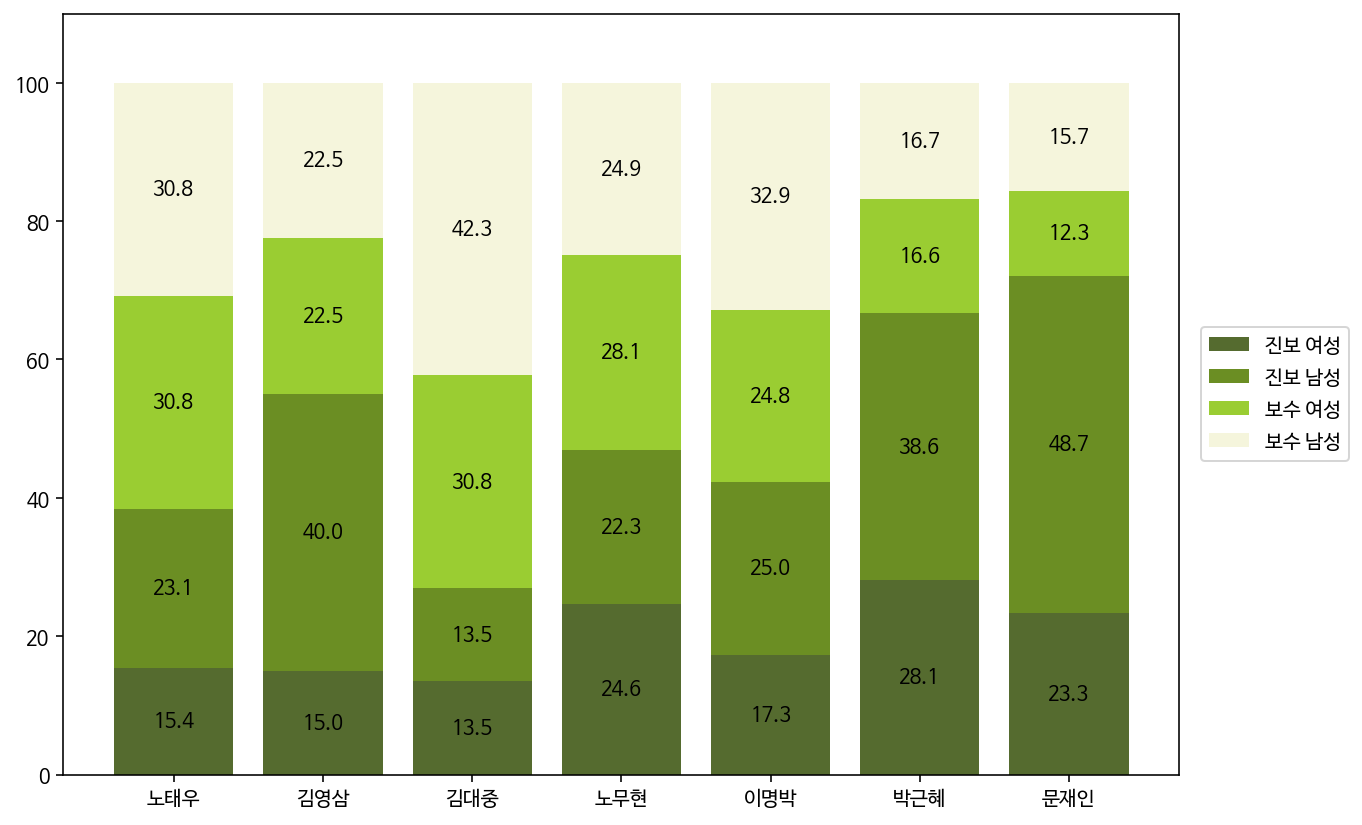

In [45]:
plt.figure(figsize=(10, 7))

plt.bar(x, y1, label='진보 여성', color='darkolivegreen')
plt.bar(x, y2, bottom=y1, label='진보 남성', color='olivedrab')
plt.bar(x, y3, bottom=y1+y2, label='보수 여성', color='yellowgreen')
plt.bar(x, y4, bottom=y1+y2+y3, label='보수 남성', color='beige')

for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3/2, y3):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3+y4/2, y4):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")    
    
plt.ylim(0,110)
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left')
plt.show()

### 정규화된 키워드 건수

In [8]:
x = ['남녀평등', '양성평등', '성평등', '성인지적/성주류화']
y1 = np.array([5,20,44,8])
y2 = np.array([0,3,1,0])
y3 = np.array([2,17,10,1])
y4 = np.array([0,2,0,0])

snum = y1+y2+y3+y4

y1 = y1/snum*100
y2 = y2/snum*100
y3 = y3/snum*100
y4 = y4/snum*100

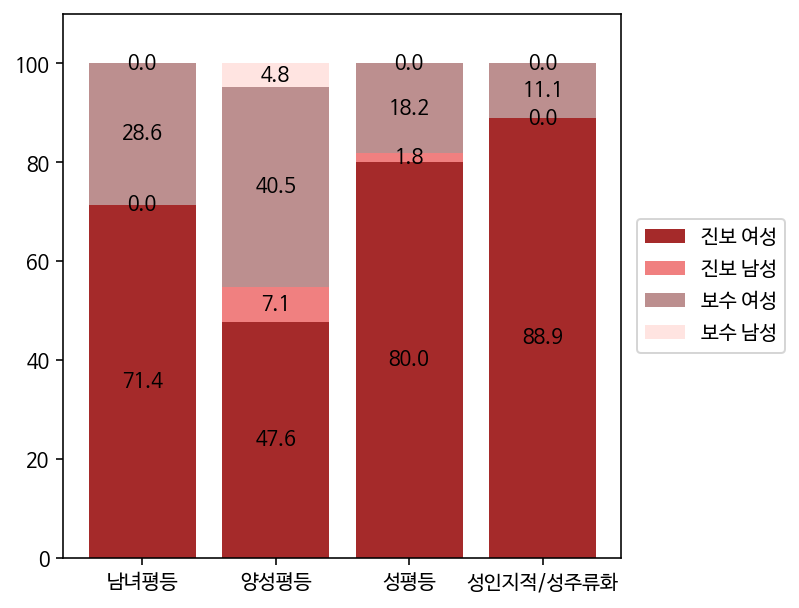

In [9]:
plt.figure(figsize=(5,5))

plt.bar(x, y1, label='진보 여성', color='brown')
plt.bar(x, y2, bottom=y1, label='진보 남성', color='lightcoral')
plt.bar(x, y3, bottom=y1+y2, label='보수 여성', color='rosybrown')
plt.bar(x, y4, bottom=y1+y2+y3, label='보수 남성', color='mistyrose')

for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3/2, y3):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3+y4/2, y4):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")    
    
plt.ylim(0,110)
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left')
plt.show()

In [6]:
x = ['남녀평등', '양성평등', '성평등', '성인지적/성주류화']
y1 = np.array([1,16,24,5])
y2 = np.array([1,29,8,4])
y3 = np.array([0,20,3,1])
y4 = np.array([0,7,3,0])

snum = y1+y2+y3+y4

y1 = y1/snum*100
y2 = y2/snum*100
y3 = y3/snum*100
y4 = y4/snum*100

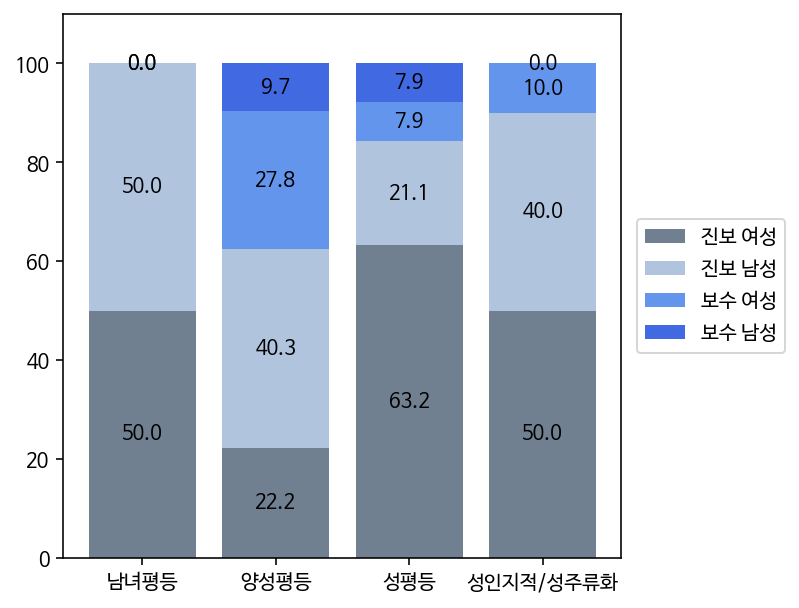

In [7]:
plt.figure(figsize=(5, 5))

plt.bar(x, y1, label='진보 여성', color='slategrey')
plt.bar(x, y2, bottom=y1, label='진보 남성', color='lightsteelblue')
plt.bar(x, y3, bottom=y1+y2, label='보수 여성', color='cornflowerblue')
plt.bar(x, y4, bottom=y1+y2+y3, label='보수 남성', color='royalblue')

for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3/2, y3):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3+y4/2, y4):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")    
    
plt.ylim(0,110)
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left')
plt.show()

### 정부별 핵심 키워드 정규화

In [46]:
x = ['노태우','김영삼','김대중','노무현','이명박','박근혜','문재인']
y1 = np.array([1,20,14,15,5,9,2])
y2 = np.array([1,1,1,32,28,61,84])
y3 = np.array([0,0,0,0,38,63,39])
y4 = np.array([0,0,0,0,17,9,10])

snum = y1+y2+y3+y4

y1 = y1/snum*100
y2 = y2/snum*100
y3 = y3/snum*100
y4 = y4/snum*100

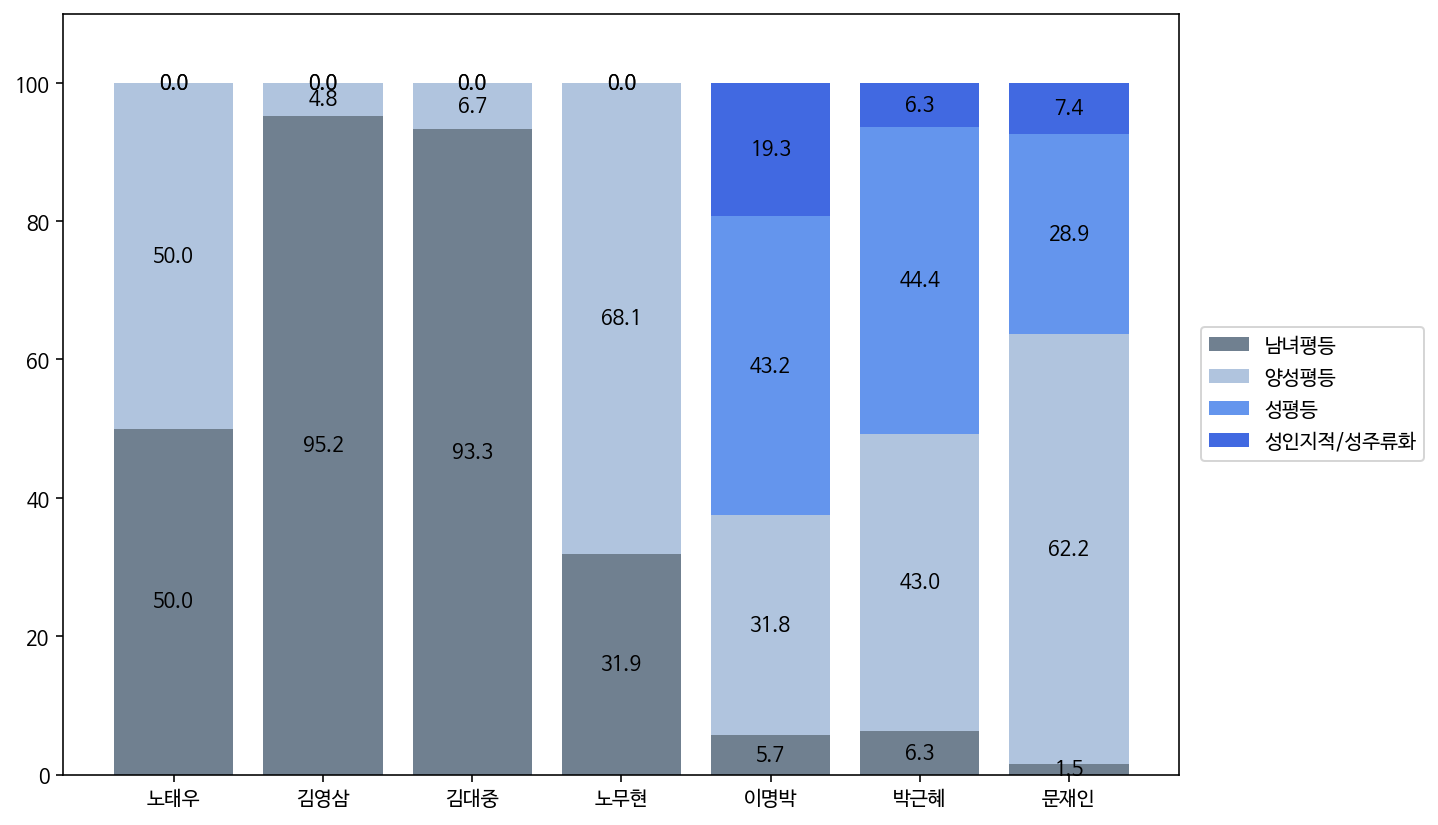

In [53]:
plt.figure(figsize=(10,7))

plt.bar(x, y1, label='남녀평등', color='slategrey')
plt.bar(x, y2, bottom=y1, label='양성평등', color='lightsteelblue')
plt.bar(x, y3, bottom=y1+y2, label='성평등', color='cornflowerblue')
plt.bar(x, y4, bottom=y1+y2+y3, label='성인지적/성주류화', color='royalblue')

for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3/2, y3):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2+y3+y4/2, y4):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center")    
    
plt.ylim(0,110)
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left')
plt.show()

In [10]:
gender['정부'].unique()

array(['노태우', '김영삼', '김대중', '노무현', '이명박', '박근혜', '문재인'], dtype=object)

In [11]:
df = pd.DataFrame(gender['정부'].value_counts()).reset_index()
df.columns = ['정부', '발의 건수']
df

,정부,발의 건수
0,문재인,1636
1,이명박,1131
2,박근혜,1123
3,노무현,447
4,김대중,92
5,김영삼,62
6,노태우,23


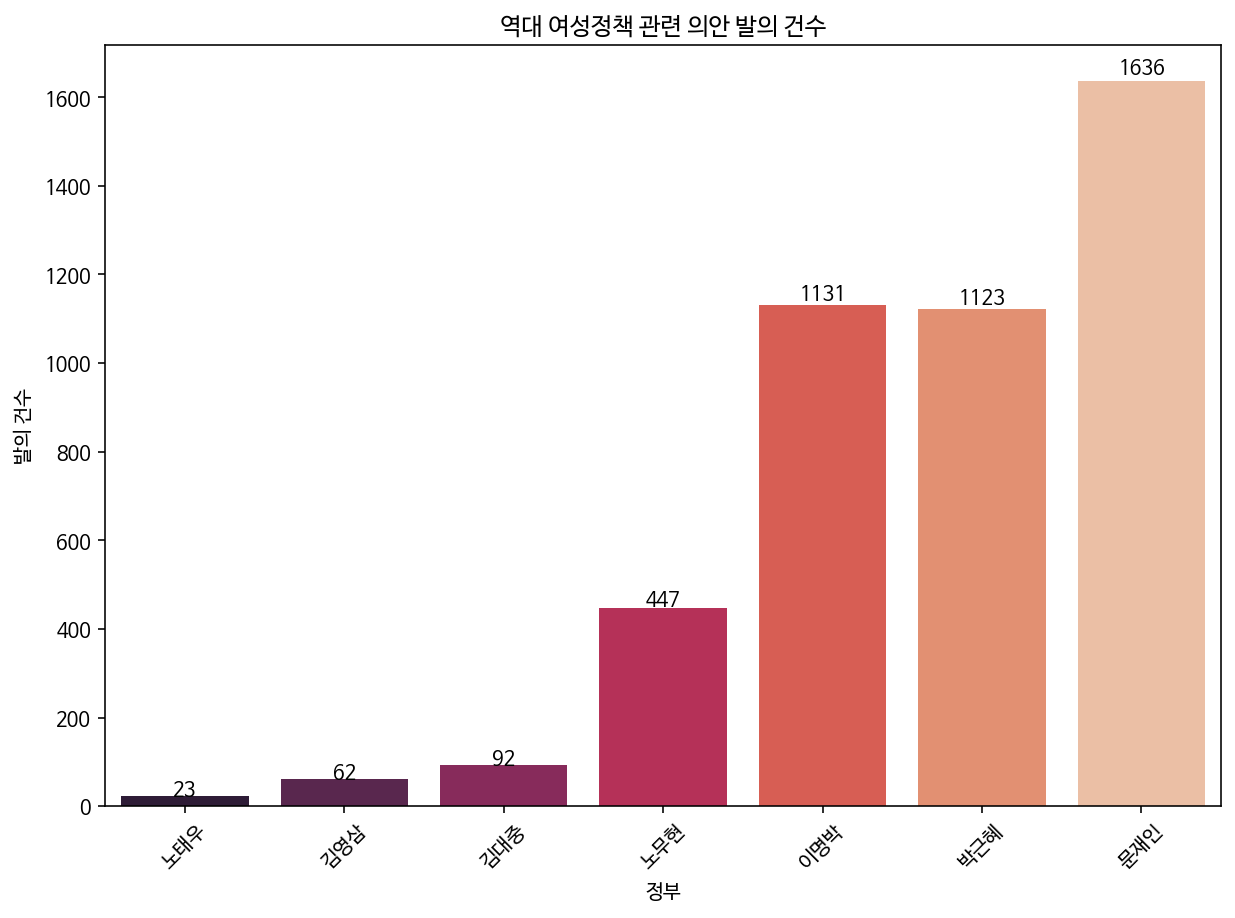

In [24]:
def commsum_vis(df): 
    order = ['노태우','김영삼','김대중','노무현','이명박','박근혜','문재인']
    
    plt.figure(figsize = (10,7))
    plt.xticks(rotation = 45)
    ax = sns.barplot(x='정부', y='발의 건수', data=df, order = order, palette='rocket')
    
    for p in ax.patches: 
        left, bottom, width, height = p.get_bbox().bounds 
        ax.annotate("%.1d" % (height), (left+width/2, height*1.01), ha='center')
    
    plt.title('역대 여성정책 관련 의안 발의 건수')
    plt.show()
    
commsum_vis(df)

In [10]:
data = pd.DataFrame(gender.groupby(['정부 sort','정부','제안자구분'])['의안번호'].count()).reset_index()
data.columns = ['정부 sort','정부','제안자구분','의안']
data

,정부 sort,정부,제안자구분,의안
0,0.노태우,노태우,위원장,6
1,0.노태우,노태우,의원,13
2,0.노태우,노태우,정부,4
3,1.김영삼,김영삼,위원장,13
4,1.김영삼,김영삼,의원,40
5,1.김영삼,김영삼,정부,9
6,2.김대중,김대중,위원장,18
7,2.김대중,김대중,의원,54
8,2.김대중,김대중,정부,20
9,3.노무현,노무현,위원장,54


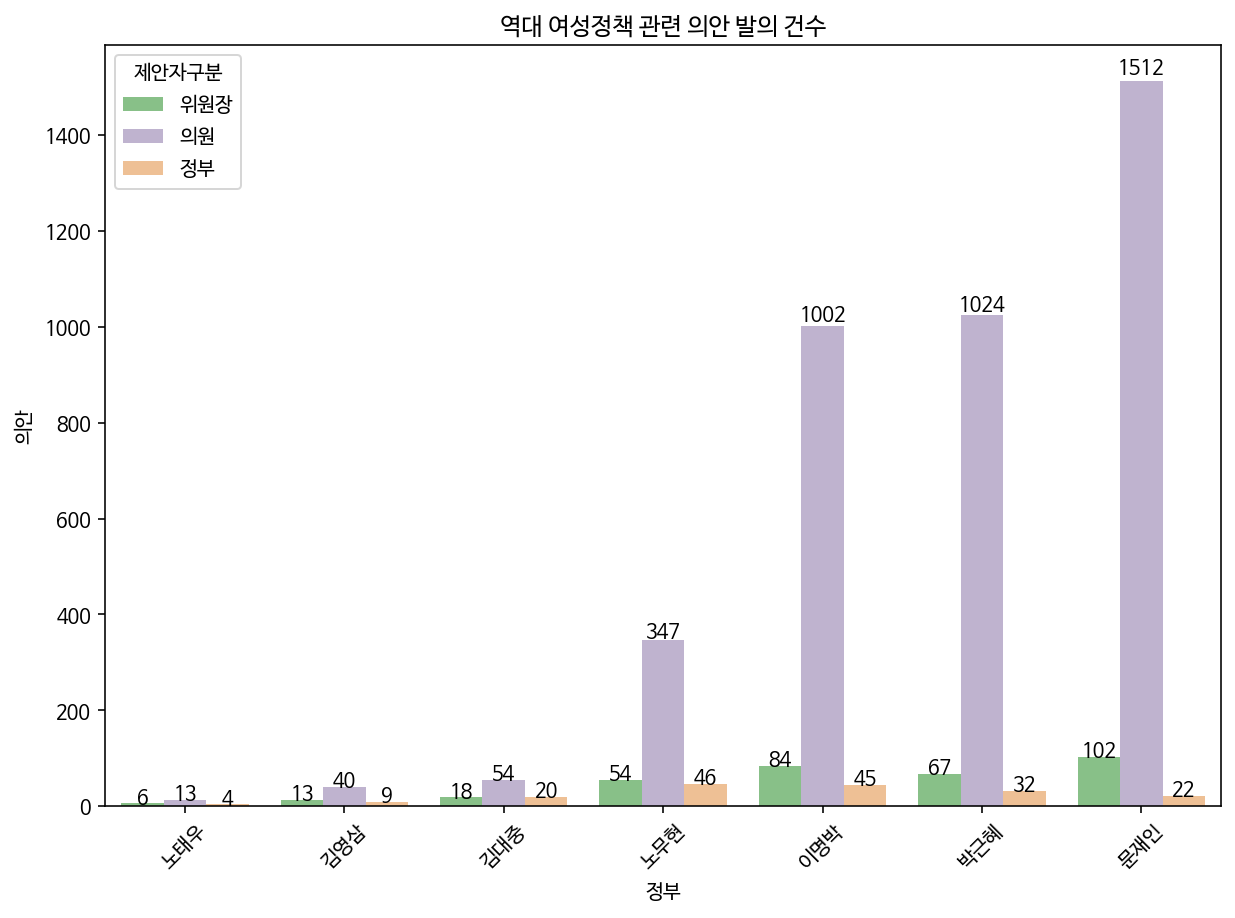

In [13]:
plt.figure(figsize = (10,7))
plt.xticks(rotation = 45)

plt.title('역대 여성정책 관련 의안 발의 건수')
ax = sns.barplot(x='정부', y="의안", hue="제안자구분", data=data, palette="Accent")

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.1d"%(height), (left+width/2, height*1.01), ha='center')
    
plt.show()

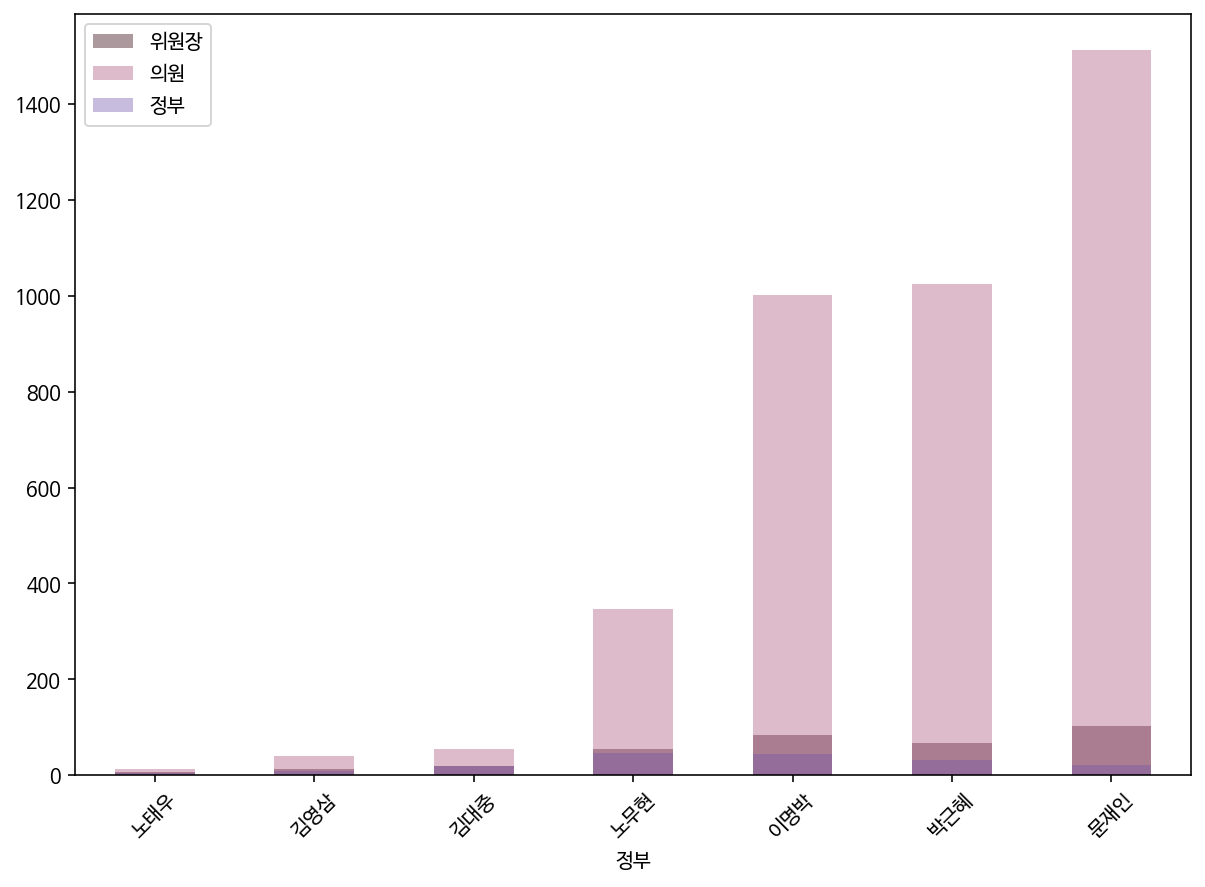

In [12]:
alpha = 0.4 
fig, ax = plt.subplots(figsize=(10,7))
proposer = data['제안자구분'].drop_duplicates()
margin_bottom = np.zeros(len(data['정부'].drop_duplicates()))
colors = ["#2e020c","#ad557d","#7555ad"]

for num, prop in enumerate(proposer):
    values = list(data[data['제안자구분'] == prop].loc[:, '의안번호'])
    data[data['제안자구분'] == prop].plot.bar(x='정부', y='의안번호', 
                                            ax=ax, stacked=True,
                                            bottom=margin_bottom, 
                                            color=colors[num],
                                            label=prop,
                                            alpha=alpha)
    
plt.xticks(rotation = 45)
plt.show()

## 정부-정당-성별 의안 발의수

In [11]:
pd.DataFrame(gender.groupby(['정부','정당성향','성별'])['발의자'].count())

발의자
정부  정당성향 성별     
김대중 보수   남성   22
         여성   16
    진보   남성    7
         여성    7
김영삼 보수   남성    9
         여성    9
    진보   남성   16
         여성    6
노무현 보수   남성   86
         여성   97
    진보   남성   77
         여성   85
노태우 보수   남성    4
         여성    4
    진보   남성    3
         여성    2
문재인 보수   남성  234
         여성  184
    진보   남성  728
         여성  349
박근혜 보수   남성  170
         여성  168
    진보   남성  392
         여성  285
이명박 보수   남성  321
         여성  242
    진보   남성  244
         여성  169

## 핵심 키워드 시각화

In [23]:
data2 = {'정부':['노태우','노태우','노태우','노태우','김영삼','김영삼','김영삼','김영삼','김대중','김대중','김대중','김대중',
                '노무현','노무현','노무현','노무현','이명박','이명박','이명박','이명박','박근혜','박근혜','박근혜','박근혜',
                '문재인','문재인','문재인','문재인'],
         '키워드': ['남녀평등','양성평등','성평등','성인지적/성주류화','남녀평등','양성평등','성평등','성인지적/성주류화',
                 '남녀평등','양성평등','성평등','성인지적/성주류화','남녀평등','양성평등','성평등','성인지적/성주류화',
                 '남녀평등','양성평등','성평등','성인지적/성주류화','남녀평등','양성평등','성평등','성인지적/성주류화',
                 '남녀평등','양성평등','성평등','성인지적/성주류화'], 
        '키워드 횟수': [1,1,0,0,20,1,0,0,14,1,0,0,15,32,0,0,5,28,38,17,9,61,63,9,2,84,39,10]}
df = pd.DataFrame(data2)
df

,정부,키워드,키워드 횟수
0,노태우,남녀평등,1
1,노태우,양성평등,1
2,노태우,성평등,0
3,노태우,성인지적/성주류화,0
4,김영삼,남녀평등,20
5,김영삼,양성평등,1
6,김영삼,성평등,0
7,김영삼,성인지적/성주류화,0
8,김대중,남녀평등,14
9,김대중,양성평등,1


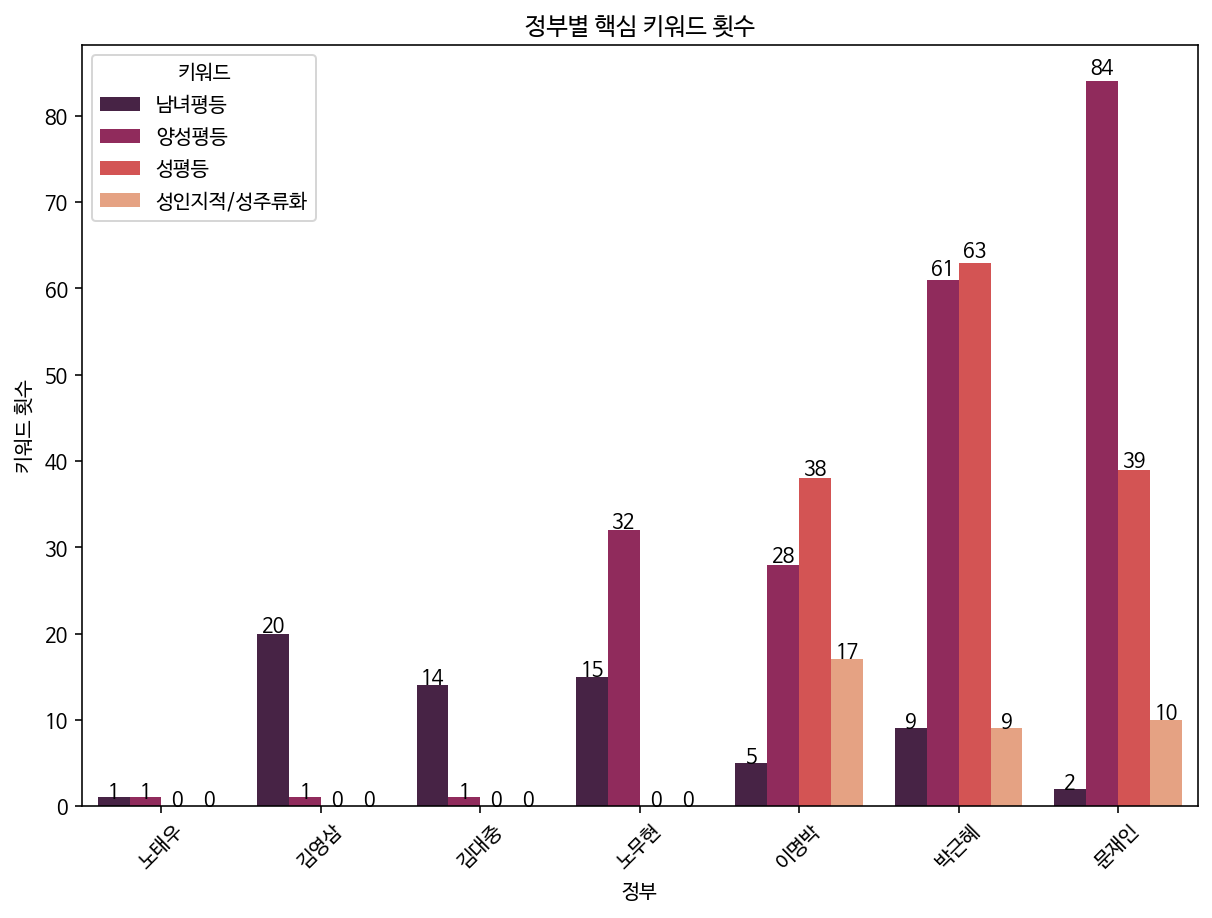

In [33]:
plt.figure(figsize = (10,7))
plt.xticks(rotation = 45)

plt.title('정부별 핵심 키워드 횟수')
ax = sns.barplot(x='정부', y="키워드 횟수", hue="키워드", data=df, palette="rocket")

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%.1d"%(height), (left+width/2, height*1.01), ha='center')
    
plt.show()